# Uncommon Discovery of Two Gas Giants Exhibiting TTVs

## Candidate number: 24528

<div class="alert alert-block alert-danger">
<b>Candidate number: Your candidate number here (this is a five digit number). </b>

- This Coursework contributes <b>80%</b> to your overall unit mark.

- Will be marked anonymously.

- Keep to word limits (+- a few words).

- You can use the WordCounter notebook to check your word count.

- Code & figure captions do not count towards word limits.
</div>

### Abstract: 

Here, give an overview of your work, make sure to describe the science background, methods, results as well as comparisons to literature data. Keep this short.
<div class="alert alert-block alert-danger">
    
<b>word limit 250 words.</b>

Two planets were detected by analysis of a Kepler lightcurve using lomb-scargle periodograms to find periods of 19.23 days and 38.893 days, which puts the planets in mean motion resonance (MMR) as their periods are near exact multiples of each other. By fitting quadratic curves to the transits it was found that the planets, Peanut Butter and Strawberry Jelly, have radii of (8.88$\pm$0.10)$R_{Earth}$ and (8.82$\pm$0.10)$R_{Earth}$, with average densities of (3.41 +0.17/-0.19) x $10^2$ kg/m$^3$ and (4.31 +0.24/-0.26) x $10^2$ kg/m$^3$ respectively. With large radii and low masses, this likely makes the planets gas giants. Analysis of transit timing variations (TTVs), due to being in MMR, gave maximum deviations of 1.4 and 5.8 days, which when compared to theory (Argol 2005), had a 9% and 16% discrepancy from values calculated using masses obtained via private communication. From TTV variations we may get constraints on mass which usually are only obtainable via radial velocity methods.

Comparison to the general population reveals that Peanut Butter and Strawberry Jelly are outliers. Statistical tests and other literature (Anayeva et al 2020) point slightly more towards this being due to low numbers of planets with this specification as opposed to selection effects. However, since the comparison sample distributions between the radii of planets discovered via transit and radial velocity are unfairly weighted (~234 times more transits than radial velocity), more observations should be carried out to determine radii of planets previously detected by radial velocity to definitively answer this question. 

#### Imports: give all your imports in a box here. Any custom code you have stored in a .py file needs to be submitted with your coursework. You can freely use all code provided to you as part of this course. If you use code not encountered in the course, give a link to the online repo.

In [1]:
import numpy
from astropy.io import fits 
import matplotlib.pyplot as plt
import glob
import numpy as np
import pandas as pd
import scipy.signal
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import numpy.ma as ma
from CompSample import density_scatter
import seaborn as sns
import matplotlib.cm as cm
import pylab

<div class="alert alert-block alert-danger">
<b>Make sure to include the relevant python files in your upload</b>

### 1. Introduction:

Give an introduction to your coursework. This should be a short description of exoplanets as well as a description of background relevant to your Discussion.

Your introduction should be understandable to a student having taken Intro to astro and Planets & Exoplanets. 

<div class="alert alert-block alert-danger">
<b>Word limit: 600 words</b>

Exoplanets can be detected via transit methods, radial velocity, direct imaging, microlensing and astrometry. Here, we are going to discuss the transit method and use it to first 'detect' planets orbiting a star system and then derive physical properties of the planets. The first planet detected as outlined by Dunham (2018) via the transit method was HD209458 in 1999 and since then, thousands more have been detected in the same way. In order to use the transit method, there are certain conditions that must be met for detection to be effective. Firstly, the system must be observed edge on such that the planets transit across the face of the star, ideally with inclination of 90 degrees or close to, so a difference in flux can be measured. It follows that the planets must not orbit too far away from the star either, and they must be of significant size in order for the flux drop to be observed. These conditions set up selection effects that influence the type of stars that may be discovered via the transit method.

From a typical transit lightcurve the ratio of planetery radius to stellar radius can be determined from observations of flux change as shown by Mandel & Agol (2002). In general, there is a degeneracy between the radius and mass of the host star, however this can be broken by taking photospheric measurements of the star which according to Agol (2005) has "a precision limited to ~5%". In this case we do not consider the additional measurements required, and instead start with prior knowledge of the mass and radius of the host star. This means that we can extract the radius of the planet. Exact mass values cannot be determined without the use of radial velocity, however assuming these measurements are taken and that we have the masses of the planets from other private communication, we can move on to extracting further physical characteristics such as density.

The period of a singular planet around a star is generally fixed, however in a multi-planetary system the planets will experience perturbations due to their gravitational interaction with each other. These perturbations lead to to transit timing variations (TTVs) (Haghighipour 2015) which cause the orbiting planets to transit earlier or later than expected. When planets have periods that are nearly multiples of each other, and assuming they are in orbital alignment, then they are said to be in mean motion resonance (MMR)(Barnes 2011). The greatest TTVs occur when planets are in MMR, and such measured variations can provide enough information to get constraints on the masses. However, due to a degeneracy between mass and free eccentricity, we are only able to derive ratios/limits for the masses of the planets if free eccentricity is considered negligible- breaking the degeneracy- which Lithwick et al 2012 suggests is true for most planetary systems. In this case, the amplitude of the TTV is proportional to a ratio involving the planetary masses.

In this work we do find that the two planets are in MMR, which presents the opportunity to determine their mass ratios by analysis of their TTVs and compare it to the expected ratios given the known masses. However, the fact that the planets exhibit TTVs presents a separate challenge in first fitting the transits, because it means that the folded lightcurves do not superimpose on top of each other exactly. In the following results and discussion, we will look at the exctraction and modelling of the lightcurves, the physical parameters of the planets, TTVs, and what conclusions may be drawn when comparing to the general exoplanet population.



### 2. Results - Modelling of Kepler lightcurve

$\bullet$ describe fitting of transit depths and present results with errors -(explain attempt of folding lightcurve TTVs, quadratic and quartic fit overshot base- chi squared,pcov etc, use of mean base values and associated errors)

$\bullet$ describe periodogram and identification of periodic features in lightcurves -(lomb scargle, folded lightcurves, plot of vertical lines on main lightcurve)

$\bullet$ describe motivation for any additional fitting you have done (better fit with piecewise func?)

$\bullet$ include code for all modelling in attached code or inline, describe limitations and assumptions made

<div class="alert alert-block alert-danger">
    
<b>Keep this concise: word limit 750 words</b>

In order to find the number of planets in this system and their respective periods, we first make use of a lomb-scargle periodogram (Figure 2) with the normalised Kepler lightcurve data. This is done twice so that we are left with only the most prominent peaks that correspond to the periods of the orbiting planets. One can then fold the normalised lightcurve on these periods (adjusting period as necessary to get better folds) to obtain several superimposed transits of the same planet, with the aim of finding a fit that holds generally for all the transits. From the periodogram there are two main peaks at 19.25 and 38.45. If plotted over a larger range then several more peaks are visible, however these correspond to period multiples and are not different planets. While one may then argue that the ~38day period could just be a multiple of the ~19day period, folding the lightcurve at 38.45 reveals that they are in fact different, as an additional smearing of transits can be seen but only surrounding every other main transit dip. Smearing is seen to some degree in all of the folded lightcurves preventing a visibly clean general transit, suggesting the planets are in MMR. Since the periods of the planets suffer from significant TTVs, it is impossible to get a meaningful transit curve that can be accurately modelled by folding the lightcurve. From here on out, I will refer to the planet with a 19 day period as "Peanut Butter" and the planet with a 38 day period as "Strawberry Jelly".

To work around the TTVs, vertical lines are plotted over the original normalised lightcurve that help to indicate which transit belongs to which planet as seen in Figure 1. Plotting periodic lines also helps to determine what the best 'true' period is for the planets which was found to be 19.23 days and 38.938 days, by virtue of observing which period value led to the most number of transits coinciding with a line. The transits can also be distinguished by their depths, with Peanut Butter being the deeper of the two, however this can be difficult to do at a glance which makes the colour coded vertical lines the preferred differentiator.

Using the coloured lines as a guide, five transits for each planet were picked out from the lightcurve and individually fitted. Both standard quartic and modified quartic fits were tried, with the modified quartic proving to be the better option to match the flatter base of the transits. This can be seen in Figures 3 & 4, where one transit for each planet has been fit with both for comparison. Quantitatively, this choice can also be supported by comparing the reduced $\chi^2$ statistics, 22.42 and 22.48 for standard quartic with 0.72 and 2.73 for modified quartic, and by observation of the residual spreads (Figure 5). The standard quartic did not fit as well because the first two free parameters as determined by curve_fit were too small, hence making it behave like a quadratic function. The modified quartic fit takes into account significant values like beginning and end transit times, as well as transit depth, making it more useful as well as providing a more accurate fit. 

To fit the flux baseline, the average of the points on either side of the curve were taken and plotted as a horizontal line. The baseline and curve were fitted seperately beacuse if combined, then the quartic function output a much less ideal fit. From the individual fits a mid-point of each transit was determined, enabling all of the transits to be stacked on top of each other, and centered at 0.0. The different baselines were then averaged and plotted as one single line across the stacked transits. A final fit was made for the combined plot of five transits and the depth was determined by taking the minimum of the overall fit subtracted from the average baseline value. For Peanut Butter the depth was determined to be 0.006611 +/- 0.000074, and for Strawberry Jelly the depth was 0.00566 +/- 0.00010. Error on depth comes from the associated diagonal element from the covariance matrix of the fit, because depth is one of the free parameters defined in the quartic function. 


In [2]:
#functions used throughout code

#returns a standard quadratic fit
def para(x,b,c,d,e,f):
    return b*x**4 + c*x**3 + d*x**2 + e*x + f 

#returns a modified quadratic fit using relevant free parameters within the context of the tranit curve
#takes arguments beginning transit time, end transit time, and depth
def quartic(x,beg,end,depth):
    y=((1-depth)*(2/(end-beg))**4)*(x-(end+beg)*0.5)**4 + depth
    return y

#resturns the chi squared statistic
def chisquared(y, error, ymodel):
    return np.sum((y-ymodel)**2/error**2)

#returns the average baseline/intrinsit star flux measured local to the transit
#takes arguments beginning time and end time for base before tansit, and beginning time and end time 
#for base after transit
def baseline(beg1,end1,beg2,end2):
    basemask1 = (curve['time']>beg1) & (curve['time']<end1)
    basemask2 = (curve['time']>beg2) & (curve['time']<end2)
    baseline = (np.mean(curve['flux'][basemask1])+np.mean(curve['flux'][basemask2]))/2
    return baseline

#returns a sine wave
def sinwave(x,amp,t,c):
    return (amp*np.sin(x*t))+c

#returns a Gaussian
def gauss(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

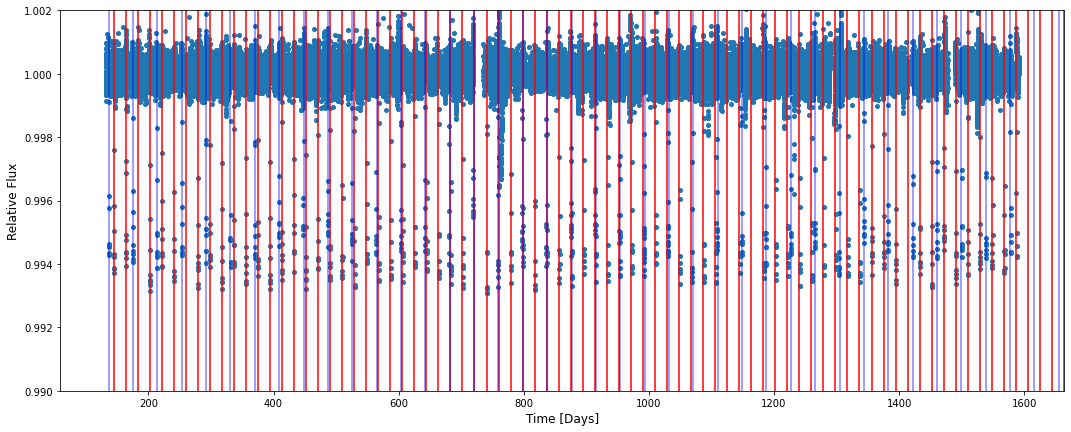

In [3]:
#reading in normalised lightcurve data
curve = pd.read_csv('normalised_curve.txt', delimiter =',', usecols=[0,1,2], names=['time', 'flux', 'error'])
plt.figure(figsize=(18,7))
plt.plot(curve['time'],curve['flux'], ls='None',marker ='o', markersize=4)
plt.ylim(0.99,1.002)
plt.xlabel('Time [Days]', size='12')
plt.ylabel('Relative Flux', size='12')

#expected periods of planets adjusted for a best fit
actper = 19.23 
actper2 =38.938

#plotting vertical lines where transits should be
#red identifys P~19day planet, blue identifys P~38day planet
#additional numbers added to start lines at correct first transit
for i in range(80):
    plt.axvline((actper*i+144.243013), c='r')
for i in range(40):
    plt.axvline((actper2*i+136.451013), c='b', alpha=0.5)

*Figure 1.* Normalised Kepler lightcurve made up of 17 stitched together observation files. Vertical lines are plotted and colour coded to distingush between Peanut Butter's transits every ~19.23 days in red and Strawberry Jelly's transits every ~38.938 days in blue. To pick out individual transits an x limit can be imposed to 'zoom' in on them

19.245724572457245 38.462046204620464


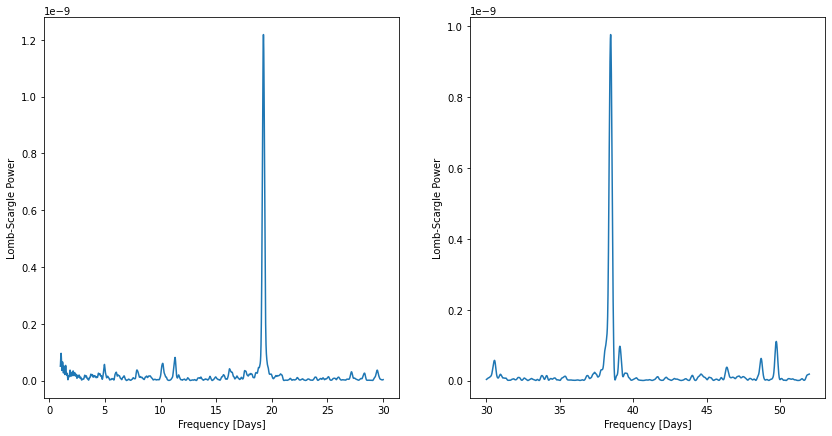

In [4]:
#setting up lomb-scargle periodograms

#evenly ditribute points between 1/longest freqency and 1/shortest frequency
freqs = np.linspace((1/1459.5),(1/0.021), 3000)
lomb = scipy.signal.lombscargle(curve['time'], curve['flux'], freqs, precenter=True)

#repeat to obtain cleaner periodograms and filter any aliasing effects
period1 =np.linspace(1,30,10000)
period2 =np.linspace(30,52,10000)
lomb1 = scipy.signal.lombscargle(freqs, lomb, period1, precenter=True)
lomb2 = scipy.signal.lombscargle(freqs, lomb, period2, precenter=True)

#plotting the two periodograms on one figure for comparison
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(7)
fig.set_figwidth(14)

ax1.plot(period1, lomb1)
ax1.set(xlabel='Frequency [Days]', ylabel='Lomb-Scargle Power')
ax2.plot(period2, lomb2)
ax2.set(xlabel='Frequency [Days]', ylabel='Lomb-Scargle Power')


#x-value loaction of the highest peaks corresponding to periods
print(period1[np.argmax(lomb1)], period2[np.argmax(lomb2)])

*Figure 2.* Periodograms created using the lombscargle statistical tool showing large peaks at values where the periodicity matches that of periodic features of the lightcurve. Two significant peaks are found after using lomb-scargle twice, to reduce aliasing effects, at 19.25 days (left) and 38.46 days (right) which correspond to the periods of our two planets.

0.006610998115959776
[6.89584600e-04 6.62196070e-04 7.38113861e-05]


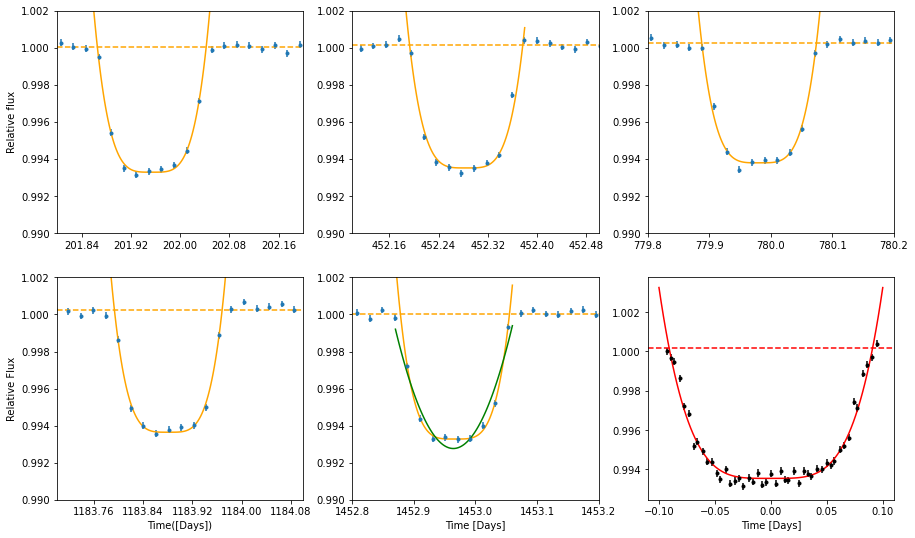

In [5]:
fig = plt.figure()
fig.set_figheight(9)
fig.set_figwidth(15)


#figure 1/6 transit 1
ax1 = fig.add_subplot(2, 3, 1)
xrange191=np.linspace(201.86,202.05,100) 
mask191 = (curve['time']>201.86) & (curve['time']<202.05) #masking to fit only the transit curve
popt191, pcov191 = curve_fit(quartic,curve['time'][mask191], curve['flux'][mask191], sigma=curve['error'][mask191],
                             p0=(201.85,202.05,0.007))
ax1.set(ylabel='Relative Flux')

#plot of lightcurve data
plt.errorbar(curve['time'],curve['flux'],curve['error'], ls='None',marker ='o', markersize=3)
#limits to focus on relevant transit
plt.xlim(201.8,202.2)
plt.ylim(0.99,1.002)
ax1.xaxis.set_major_locator(plt.MaxNLocator(5)) #cleaning up x tick formatting
ax1.set(ylabel='Relative flux')

#plotting fit and baseline 
ydata=quartic(xrange191, *popt191)
plt.plot(xrange191,ydata, color='orange')
base191=baseline(201.8,201.86,202.05,202.2)
plt.axhline(base191, color='orange', ls='--')


#figure 2/6 transit 2
ax2 = fig.add_subplot(2, 3, 2)
xrange192=np.linspace(452.18,452.38,100)
mask192 = (curve['time']>452.18) & (curve['time']<452.38) #masking to fit only the transit curve
popt192, pcov192 = curve_fit(quartic,curve['time'][mask192], curve['flux'][mask192], sigma=curve['error'][mask192],
                             p0=(452.1,452.4,0.007))

#plot of lightcurve data
plt.errorbar(curve['time'],curve['flux'],curve['error'], ls='None',marker ='o', markersize=3)
#limits to focus on relevant transit
plt.xlim(452.1,452.5)
plt.ylim(0.99,1.002)
ax2.xaxis.set_major_locator(plt.MaxNLocator(5)) #cleaning up x tick formatting

#plotting fit and baseline 
ydata=quartic(xrange192, *popt192)
plt.plot(xrange192,ydata, color='orange')
base192=baseline(452.1,452.18,452.38,452.5)
plt.axhline(base192, color='orange', ls='--')


#figure 3/6 transit 3
ax3 = fig.add_subplot(2, 3, 3)
xrange193=np.linspace(779.88,780.08,100)
mask193 = (curve['time']>779.88) & (curve['time']<780.08) #masking to fit only the transit curve
popt193, pcov193 = curve_fit(quartic,curve['time'][mask193], curve['flux'][mask193], sigma=curve['error'][mask193],
                             p0=(779.85,780,0.007))

#plot of lightcurve data
plt.errorbar(curve['time'],curve['flux'],curve['error'], ls='None',marker ='o', markersize=3)
#limits to focus on relevant transit
plt.xlim(779.8,780.2)
plt.ylim(0.99,1.002)

#plotting fit and baseline 
ydata=quartic(xrange193, *popt193)
plt.plot(xrange193,ydata, color='orange')
base193=baseline(779.80,779.88,780.08,780.2)
plt.axhline(base193, color='orange', ls='--')


#figure 4/6 tansit 4
ax4 = fig.add_subplot(2, 3, 4)
xrange194=np.linspace(1183.78,1183.98,100)
mask194 = (curve['time']>1183.78) & (curve['time']<1183.98) #masking to fit only the transit curve
popt194, pcov194 = curve_fit(quartic,curve['time'][mask194], curve['flux'][mask194], sigma=curve['error'][mask194],
                             p0=(1183.8,1183.95,0.007))

#plot of lightcurve data
plt.errorbar(curve['time'],curve['flux'],curve['error'], ls='None',marker ='o', markersize=3)
#limits to focus on relevant transit
plt.xlim(1183.7,1184.1)
plt.ylim(0.99,1.002)
ax4.xaxis.set_major_locator(plt.MaxNLocator(5)) #cleaning up x tick formatting
ax4.set(xlabel='Time([Days])', ylabel='Relative Flux')

#plotting fit and baseline 
ydata=quartic(xrange194, *popt194)
plt.plot(xrange194,ydata,color='orange')
base194=baseline(1183.7,1183.78,1183.98,1184.1)
plt.axhline(base194, color='orange', ls='--')


#figure 5/6 transit 5
ax5 = fig.add_subplot(2, 3, 5)
xrange195=np.linspace(1452.87,1453.06,100)
mask195 = (curve['time']>1452.87) & (curve['time']<1453.06) #masking to fit only the transit curve
popt195, pcov195 = curve_fit(quartic,curve['time'][mask195], curve['flux'][mask195], sigma=curve['error'][mask195],
                             p0=(1452.85,1453,0.007))
popt1955, pcov1955 = curve_fit(para,curve['time'][mask195], curve['flux'][mask195], sigma=curve['error'][mask195])

#plot of lightcurve data
plt.errorbar(curve['time'],curve['flux'],curve['error'], ls='None',marker ='o', markersize=3)
#limits to focus on relevant transit
plt.xlim(1452.8,1453.2)
plt.ylim(0.99,1.002)
ax5.set(xlabel='Time [Days]')

#plotting fit and baseline 
ydata=quartic(xrange195, *popt195)
plt.plot(xrange195,ydata, color='orange')
plt.plot(xrange195,para(xrange195,*popt1955), color='green')
base195=baseline(1452.8,1452.87,1453.06,1453.2)
plt.axhline(base195, color='orange', ls='--')


#figure 6/6 combined plot of transits
ax6 = fig.add_subplot(2, 3, 6)

#merging data from 5 previous transits and plotting about zero using quartic free parameters to define centre of curve
times19=pd.concat([curve['time'][mask191]-(popt191[1]+popt191[0])*0.5,curve['time'][mask192]-\
                   (popt192[1]+popt192[0])*0.5,curve['time'][mask193]-(popt193[1]+popt193[0])*0.5,
                   curve['time'][mask194]-(popt194[1]+popt194[0])*0.5,
                   curve['time'][mask195]-(popt195[1]+popt195[0])*0.5])
fluxes19=pd.concat([curve['flux'][mask191],curve['flux'][mask192],curve['flux'][mask193],
                    curve['flux'][mask194],curve['flux'][mask195]])
errors19=pd.concat([curve['error'][mask191],curve['error'][mask192],curve['error'][mask193],
                    curve['error'][mask194],curve['error'][mask195]])

plt.errorbar(times19,fluxes19,errors19,ls='None', markersize=3, color='k', marker='o')
#fit using new merged data
popt19,pcov19 = curve_fit(quartic,times19,fluxes19, sigma=errors19, p0=(-0.1,0.1,0.007))
xrange19= np.linspace(-0.1,0.1,100)

#plotting general fit and averaged baseline
plt.plot(xrange19,quartic(xrange19,*popt19),color='r')
baseline19= np.mean([base191,base192,base193,base194,base195])
plt.axhline(baseline19,ls='--', color='r')
ax6.set(xlabel='Time [Days]')

print(baseline19-np.min(quartic(xrange19,*popt19))) #depth of fit
print(np.sqrt(np.diag(pcov19))) #error on transit time beginning, end and depth


*Figure 3.* Counting from left to right and starting from the first row, the first five plots show individual transits of Peanut Butter fit with a modified quartic function and a baseline determined by the average of the points either side of the solid orange curves. The fifth plot shows a comparison of one type of standard quartic fit in green, which overshoots the base of the transit and has such small coefficients that it behaves like a quadratic. This gives an inaccurate depth, which is one reason why the orange modified quartic fit was chosen instead. In the final plot, the previous five transits are superposed about their transit centres and a final general fit is made. For the final plot baseline, an average of the previous baselines has been used. A depth of 0.006611 +/- 0.000074 is obtained, with error as determined by the covariance matrix of the quadratic fit.

0.005655826933487318
[6.89584600e-04 6.62196070e-04 7.38113861e-05]


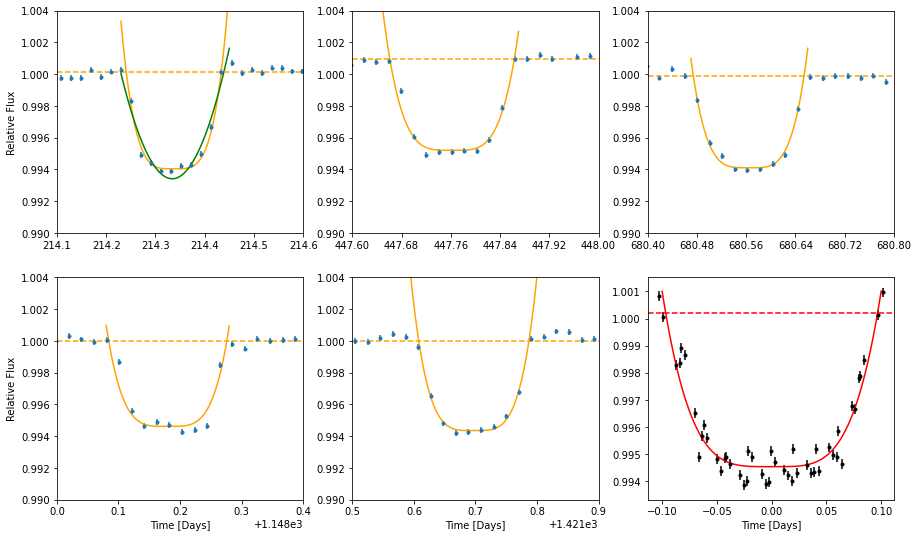

In [6]:
fig = plt.figure()
fig.set_figheight(9)
fig.set_figwidth(15)

#figure 1/6 transit 1
ax1 = fig.add_subplot(2, 3, 1)
xrange381=np.linspace(214.23,214.45,100)
mask381 = (curve['time']>214.23) & (curve['time']<214.45) #masking to fit only the transit curve
popt3811, pcov3811 = curve_fit(para,curve['time'][mask381], curve['flux'][mask381], sigma=curve['error'][mask381])
popt381, pcov381 = curve_fit(quartic,curve['time'][mask381], curve['flux'][mask381], sigma=curve['error'][mask381],
                             p0=(214.2,214.45,0.006))

#plot of lightcurve data
plt.errorbar(curve['time'],curve['flux'],curve['error'], ls='None',marker ='o', markersize=3)
#limits to focus on relevant transit
plt.xlim(214.1,214.6)
plt.ylim(0.99,1.004)
ax1.set(ylabel='Relative Flux')

#plotting fit and baseline 
ydata=quartic(xrange381, *popt381)
plt.plot(xrange381,ydata, color='orange')
plt.plot(xrange381, para(xrange381, *popt3811), color='green')
base381=baseline(214.1,214.23,214.45,214.6)
plt.axhline(base381, color='orange', ls='--')


#figure 2/6 tansit 2
ax2 = fig.add_subplot(2, 3, 2)
xrange382=np.linspace(447.65,447.87,100)
mask382 = (curve['time']>447.65) & (curve['time']<447.87) #masking to fit only the transit curve
popt382, pcov382 = curve_fit(quartic,curve['time'][mask382], curve['flux'][mask382], sigma=curve['error'][mask382],
                             p0=(447.65,447.85,0.006))

#plot of lightcurve data
plt.errorbar(curve['time'],curve['flux'],curve['error'], ls='None',marker ='o', markersize=3)
#limits to focus on relevant transit
plt.xlim(447.6,448)
plt.ylim(0.99,1.004)
ax2.xaxis.set_major_locator(plt.MaxNLocator(5)) #cleaning up x tick formatting
 
#plotting fit and baseline     
ydata=quartic(xrange382, *popt382)
plt.plot(xrange382,ydata, color='orange')
base382=baseline(447.6,447.65,447.87,448)
plt.axhline(base382, color='orange', ls='--')


#figure 3/6 transit 3
ax3 = fig.add_subplot(2, 3, 3)
xrange383=np.linspace(680.47,680.66,100)
mask383 = (curve['time']>680.47) & (curve['time']<680.66) #masking to fit only the transit curve
popt383, pcov383 = curve_fit(quartic,curve['time'][mask383], curve['flux'][mask383], sigma=curve['error'][mask383],
                             p0=(680.4,680.6,0.006))

#plot of lightcurve data
plt.errorbar(curve['time'],curve['flux'],curve['error'], ls='None',marker ='o', markersize=3)
#limits to focus on relevant transit
plt.xlim(680.4,680.8)
plt.ylim(0.99,1.004)
ax3.xaxis.set_major_locator(plt.MaxNLocator(5)) #cleaning up x tick formatting

#plotting fit and baseline 
ydata=quartic(xrange383, *popt383)
plt.plot(xrange383,ydata, color='orange')
base383=baseline(680.4,680.47,680.66,680.8)
plt.axhline(base383, color='orange', ls='--')


#figure 4/6 transit 4
ax4 = fig.add_subplot(2, 3, 4)
xrange384=np.linspace(1148.08,1148.28,100)
mask384 = (curve['time']>1148.08) & (curve['time']<1148.28) #masking to fit only the transit curve
popt384, pcov384 = curve_fit(quartic,curve['time'][mask384], curve['flux'][mask384], sigma=curve['error'][mask384],
                             p0=(1148.08,1148.27,0.006))

#plot of lightcurve data
plt.errorbar(curve['time'],curve['flux'],curve['error'], ls='None',marker ='o', markersize=3)
#limits to focus on relevant transit
plt.xlim(1148,1148.4)
plt.ylim(0.99,1.004)
ax4.set(xlabel='Time [Days]')
ax4.set(ylabel='Relative Flux')

#plotting fit and baseline 
ydata=quartic(xrange384, *popt384)
plt.plot(xrange384,ydata, color='orange')
base384=baseline(1148,1148.1,1148.27,1148.4)
plt.axhline(base384,color='orange', ls='--')


#figure 5/6 transit 5
ax5 = fig.add_subplot(2, 3, 5)
xrange385=np.linspace(1421.5,1421.9,100)
mask385 = (curve['time']> 1421.62 ) & (curve['time'] < 1421.78) #masking to fit only the transit curve
popt385, pcov385 = curve_fit(quartic,curve['time'][mask385], curve['flux'][mask385], sigma=curve['error'][mask385],
                             p0=(1421.6,1421.8,0.006))

#plot of lightcurve data
plt.errorbar(curve['time'],curve['flux'],curve['error'], ls='None',marker ='o', markersize=3)
#limits to focus on relevant transit
plt.xlim(1421.5,1421.9)
plt.ylim(0.99,1.004)
ax5.set(xlabel='Time [Days]')

#plotting fit and baseline 
ydata=quartic(xrange385, *popt385)
plt.plot(xrange385,ydata, color='orange')
base385=baseline(1421.5,1421.6,1421.77,1421.9)
plt.axhline(base385,color='orange', ls='--')


#figure 6/6 combined plot of transits
ax6 = fig.add_subplot(2, 3, 6)

#merging data from 5 previous transits and plotting about zero using quartic free parameters to define centre of curve
times38=pd.concat([curve['time'][mask381]-(popt381[1]+popt381[0])*0.5,
                   curve['time'][mask382]-(popt382[1]+popt382[0])*0.5,
                   curve['time'][mask383]-(popt383[1]+popt383[0])*0.5,
                   curve['time'][mask384]-(popt384[1]+popt384[0])*0.5,
                   curve['time'][mask385]-(popt385[1]+popt385[0])*0.5])
fluxes38=pd.concat([curve['flux'][mask381],curve['flux'][mask382],curve['flux'][mask383],
                    curve['flux'][mask384],curve['flux'][mask385]])
errors38=pd.concat([curve['error'][mask381],curve['error'][mask382],curve['error'][mask383],
                    curve['error'][mask384],curve['error'][mask385]])

#fit using new merged data
plt.errorbar(times38,fluxes38,errors38,ls='None', markersize=3, marker='o',color='k')
popt38,pcov38 = curve_fit(quartic,times38,fluxes38, sigma=errors38, p0=(-0.1,0.1,0.006))
xrange38= np.linspace(-0.1,0.1,100)

#plotting general fit and averaged baseline
plt.plot(xrange38,quartic(xrange38,*popt38),color='r')
baseline38= np.mean([base381,base382,base383,base384,base385])
plt.axhline(baseline38,ls='--', color='r')
ax6.set(xlabel='Time [Days]')

print(baseline38-np.min(quartic(xrange38,*popt38))) #depth of fit
print(np.sqrt(np.diag(pcov19))) #error on transit time beginning , transit time end and depth

*Figure 4.* Counting from left to right and starting from the first row, the first five plots show individual transits of Strawberry Jelly fit with a modified quartic function and a baseline determined by the average of the points either side of the solid orange curves. The first plot shows a comparison of one type of standard quartic fit in green, which overshoots the base of the transit and has such small coefficients that it behaves like a quadratic. This gives an inaccurate depth, which is one reason why the orange modified quartic fit was chosen instead. In the final plot, the previous five transits are superposed about their transit centres and a final general fit is made. For the final plot baseline, an average of the previous baselines has been used. A depth of 0.00566 +/- 0.00010 is obtained, with error as determined by the covariance matrix of the quadratic fit.

[Text(0.5, 0, 'Time[Days]')]

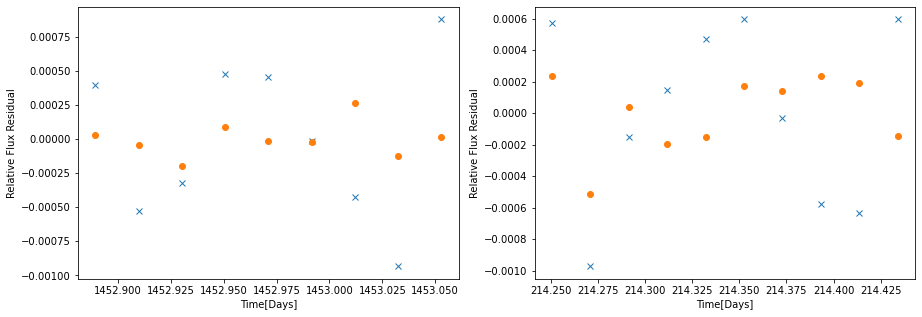

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)

#Reisduals for fits of Peanut Butter
ax1.plot(curve['time'][mask195],curve['flux'][mask195]- para(curve['time'][mask195], *popt1955),ls='None', marker ='x')
ax1.plot(curve['time'][mask195],curve['flux'][mask195]- quartic(curve['time'][mask195], *popt195),ls='None', marker ='o')
ax1.set(ylabel='Relative Flux Residual')
ax1.set(xlabel='Time[Days]')
ax1.xaxis.set_major_locator(plt.MaxNLocator(8)) #cleaning up x tick formatting
#Residuals for fits of Strawberry Jelly
ax2.plot(curve['time'][mask381],curve['flux'][mask381]- para(curve['time'][mask381], *popt3811),ls='None', marker ='x')
ax2.plot(curve['time'][mask381],curve['flux'][mask381]- quartic(curve['time'][mask381], *popt381),ls='None', marker ='o')
ax2.set(ylabel='Relative Flux Residual')
ax2.set(xlabel='Time[Days]')


*Figure 5.* Residuals for a standard quartic fit (blue 'x's) compared to a modified quartic fit (orange 'o's) for a transit of Peanut Butter (left) and Strawberry Jelly (right). It can be seen from the plot that although both sets of residuals lie evenly distributed about 0.0, the residuals for the modified quartic fit have less spread which quantifies a better fit.

In [8]:
#reduced chi squared statistics for fits of Peanut Butter
print(chisquared(curve['flux'][mask195],curve['error'][mask195], para(curve['time'][mask195], *popt1955))/4)
print(chisquared(curve['flux'][mask195],curve['error'][mask195], quartic(curve['time'][mask195], *popt195))/6)

22.428459703260966
0.7152718353019235


In [9]:
#reduced chi squared statistics for fits of Strawberry Jelly
print(chisquared(curve['flux'][mask381],curve['error'][mask381], para(curve['time'][mask381], *popt3811))/4)
print(chisquared(curve['flux'][mask381],curve['error'][mask381], quartic(curve['time'][mask381], *popt381))/6)

22.484628054540675
2.725571583096421


### 3. Discussion

$\bullet$ present comparison of your results with data, including statistical analyis and clear figures. -(compare to known values,selection effects, describe TTV mass constraints and whether agree?) 

$\bullet$ limit yourself in the presentation of results, focus on fewer results that are described well, rather than presenting many figures without clear context

$\bullet$ Include a short (~ 200 word) description of a follow-up observations that would address an open question in your report. -(how to improve TTV measurements?)


<div class="alert alert-block alert-danger">
<b>Word limit: 2000 words</b>

In [10]:
#calculating planetary parameters

#host star radius and error
r_star= 6.96e8 #meters
r_starerr= r_star*1e-2
#transit depths
depth19=baseline19-np.min(quartic(xrange19,*popt19))
depth38=baseline38-np.min(quartic(xrange38,*popt38))
#radii of planets
r19 = np.sqrt(depth19/baseline19)*r_star
r38 = np.sqrt(depth38/baseline38)*r_star

print("Radii in units Earth radius: {:.4e} and {:.4e}".format(r19/6371e3,r38/6371e3))
print("Depths: {:.4e} and {:.4e}".format(depth19,depth38))


#mass of earth
m_earth = 5.97e24 #kg
#planet masses and upper and lower limit uncertainties
m19 = 43.4*m_earth
m19err_up= 1.6*m_earth
m19err_low =2*m_earth
m38 = 29.1*m_earth
m38err_up = 1.1*m_earth
m38err_low = 1.3*m_earth
#average densities
rho19 = m19/((4/3)*np.pi*r19**3)
rho38 = m19/((4/3)*np.pi*r38**3)

print("Average Densities in kg/m^3: {:.4e} and {:.4e}".format(rho19,rho38))


G= 6.67e-11 #Gravitational const.
au= 1.496e11 #AU in m
conversion= 24*60*60 #days to seconds conversion
#host star mass and error
m_star = 2e30
m_starerr = m_star*1e-2
#periods of planets
period38 =38.938*conversion
period19= 19.230*conversion
#semi-major axis
a19= ((G*m_star*period19**2)/(2*np.pi))**(1/3)
a38= ((G*m_star*period38**2)/(2*np.pi))**(1/3)

print("Semi-Major Axis in AU: {:.4e} and {:.4e}".format(a19/au,a38/au))


#transit times
t19= (popt19[1]-popt19[0])*conversion 
t38= (popt38[1]-popt38[0])*conversion
#period using equation 
p19 = (t19*np.pi*a19)/(r_star)
p38 = (t38*np.pi*a38)/(r_star)

print("Transit time in s: {:.4e} and {:.4e}".format(t19,t38))
print("Period in days: {:.4f} and {:.4f}".format(p19/conversion,p38/conversion))

Radii in units Earth radius: 8.8818e+00 and 8.2150e+00
Depths: 6.6110e-03 and 5.6558e-03
Average Densities in kg/m^3: 3.4139e+02 and 4.3145e+02
Semi-Major Axis in AU: 2.5965e-01 and 4.1558e-01
Transit time in s: 1.5604e+04 and 1.6563e+04
Period in days: 31.6655 and 53.7945


In [11]:
#Errors associated with paramerters calcuated above

#error in baslines
err_base19=np.max([base191,base192,base193,base194,base195])-np.min([base191,base192,base193,base194,base195])
err_base38=np.max([base381,base382,base383,base384,base385])-np.min([base381,base382,base383,base384,base385])
#errors from covarience matrix of fit (transit begin time, end time, depth)
begerr19, enderr19, err_depth19 = np.sqrt(np.diag(pcov19))
begerr38, enderr38, err_depth38 = np.sqrt(np.diag(pcov38))
#error in planet radii
err_rad19= np.sqrt(((err_depth19)/(2*depth19))**2 + (err_base19/(2*baseline19))**2 + (r_starerr/r_star)**2)
err_rad38= np.sqrt(((err_depth38)/(2*depth38))**2 + (err_base38/(2*baseline38))**2 + (r_starerr/r_star)**2)

print("Radii error in Earth radii: {:.4e} and {:.4e}".format(err_rad19*r19/6371e3, err_rad38*r38/6371e3))


#density error funcion
def density_err(err_m, m, err_rad):
    return np.sqrt((err_m/m)**2 + (3*err_rad)**2)

#upper and lower bounds of average density error
u_rho19err= density_err(m19err_up,m19,err_rad19)
l_rho19err= density_err(m19err_low,m19,err_rad19)
u_rho38err= density_err(m38err_up,m38,err_rad38)
l_rho38err= density_err(m38err_low,m38,err_rad38)

print("Upper and lower bounds of density error in kg/m^3: {:.4e}, {:.4e}, {:.4e} and {:.4e}".format(u_rho19err*rho19,
                                                                                                    l_rho19err*rho19,
                                                                                                    u_rho38err*rho38, 
                                                                                                    l_rho38err*rho38))


#transit time error
t19err= begerr19 + enderr19
t38err= begerr38 +enderr38
print("Transit time error in s: {:.4e} and {:.4e}".format(t19err*conversion, t38err*conversion))

#semi major axis error (calculated by subbing in equation (4) into (3))
a19err = np.sqrt((m_starerr/m_star)**2 + (2*t19err/t19)**2 + (2*r_starerr/r_star)**2)
a38err = np.sqrt((m_starerr/m_star)**2 + (2*t38err/t38)**2 + (2*r_starerr/r_star)**2)
print("Semi-major axis error in AU: {:.4e} and {:.4e}".format(a19err*a19/au, a38err*a38/au))

#period error
p19err= np.sqrt((t19err/t19)**2 + (a19err/a19)**2 + (r_starerr/r_star)**2)
p38err= np.sqrt((t38err/t38)**2 + (a38err/a38)**2 + (r_starerr/r_star)**2)
print("Period error in %: {:.4f} and {:.4f}".format(p19err*100, p38err*100))


Radii error in Earth radii: 1.0173e-01 and 1.1011e-01
Upper and lower bounds of density error in kg/m^3: 1.7204e+01, 1.9624e+01, 2.3811e+01 and 2.5932e+01
Transit time error in s: 1.1679e+02 and 2.1004e+02
Semi-major axis error in AU: 5.8060e-03 and 9.2926e-03
Period error in %: 1.0000 and 1.0000


From the depth of the transits we can calculate the radius of the planets using the equation $$\frac{\delta F}{F}=(\frac{R_{planet}}{R_{star}})^2\tag{1}$$, where ${\delta F}$ is the depth of the transits, $F$ is the mean calculated baseline, $R_{star}$ is the radius of the host star which we take to be the radius of the sun $R_{sun}\pm 0.01 R_{sun}$, and $R_{planet}$ is our unknown planetary radius. The error in baseline is calculated as the range of the baselines which were averaged over. Solving for the planetary radii and propagating the errors through, we find that Peanut Butter has a radius of (8.88$\pm$0.10)$R_{Earth}$ and Strawberry Jelly has a radius of (8.82$\pm$0.10) $R_{Earth}$. The radii are quite close in value, however this is expected given that they have depths only approximately 0.001 apart.

With the mass of the planets taken to be (43.3 +1.6/-2) Earth masses for Peanut Butter and (29.1 +1.1/-1.3) Earth masses for Strawberry Jelly, an average density $\rho$ can be calculated using $$\rho= \frac{3M}{4\pi R^3}\tag{2}$$ which assumes the planets are spherical. Note that there are uneven errors on the planetary masses, meaning the upper and lower bounds of the absolute uncertainties propagate through to upper and lower bound uncertainties of average density too. Further knowledge of the host star's mass, taken to be 1 $\pm$ 0.01 Solar masses, paves the way for determination of the semi-major axis $a$ using Kepler's 3rd Law $$a=(\frac{GM_{star}P^2}{2\pi})^{1/3} \tag{3}$$. It was calculated that Peanut Butter has an average density of (3.41 +0.17/-0.19) x $10^2$ kg/m$^3$ with a semi-major axis of (0.260 $\pm$ 0.006) AU. Meanwhile, Strawberry Jelly has a calculated average density of (4.31 +0.24/-0.26) x $10^2$ kg/m$^3$ with a semi-major axis of (0.416 $\pm$ 0.009) AU.

To propagate the error for semi-major axis the equation for period $$P=\frac{T\pi a}{R_{star}}\tag{4}$$, where $T$ is transit time,  was subbed into (3). Error for period can also be calculated using (4), giving an uncertainty of $\pm$ 1% for both planets. Period varies due to TTVs, so this would give the associated error of a single measurement of period for a given single orbit, rather than the general error on expected period due to TTVs. The values and errors for transit time can subsequently be calculated from the first two free parameters in the quartic fit, transit time beginning subtracted from transit time end, and the errors held on them in the covariance matrix. For Peanut Butter transit time is (1.56 $\pm$ 0.12) x $10^4$s and for Strawberry Jelly it is (1.66 $\pm$ 0.21) x $10^4$s. 

If we are to use (4) to calculate the period rather than just the uncertainty, we get out values of approximately 31.7 days and 53.8 days for Peanut Butter and Strawberry Jelly respectively. These periods are significantly different in comparison to the values obtained from the periodogram and from inspection of the full normalised lightcurve, which suggests that the 'effective' stellar radius is smaller than assumed and/or semi-major axis and 'effective' transit time are greater than calculated. 'Effective' is used here because we have assumed that the planets are transiting across a path equivalent to the diameter of the star(i.e. at inclination i=0), however this may not be the case. If they are transiting across a chord of the star (where i $\neq$ 0), then the 'effective radius' that the planet covers is less than the true radius or 'effective transit time' may be less. A further assumption is that the planet is in a circular orbit, but this may not be the case and it could be orbiting with a degree of eccentricity that even changes due to the MMR perturbations, which also adds an element of uncertainty. The period and transit times are likely the two most accurate pieces of information because they are obtained directly from the data with no assumptions made, and a decrease in transit time is the opposite of what we are looking to explain. Discrepancy between periods calculated from theory and from data is therefore likely due to imperfect orbits affecting the 'effective radius', eccentricities and/or insufficiently accurate stellar properties. 

Period consistency is a different matter and can be affected by TTVs. As already established, TTVs are largest when the planets are in MMR with any j:j+n ratio where j and n are both integers. For this system we look at first order resonance with j=1 and n=1, where Agol (2005) shows that the maximum timing variation $\delta t_{max}$ as a function of period and mass ratio for a transiting planet specifically in MMR is approximately given by $$\delta t_{max}=\frac{P_{trans}}{4.5j}\frac{M_{pert}}{M_{pert}+M_{trans}}\tag{5}$$ with 'pert' denoting a property of the perturbing planet and 'trans' denoting a property of the transiting planet. If we can establish the maximum amount by which the planets deviate from their expected periods, then we have a good approximation of their mass relation to each other. In order to find $\delta t_{max}$ we plot the modulus division of each transit time by their respective period, scaled to the first transit time being the starting 'zero point'. Conditions should also be imposed such that if the modulus division returns a high value close to the period then this corresponds to a transit being early (negative $\delta t_{max}$) as opposed to late (positive $\delta t_{max}$), and what should instead be plotted is the period subtracted from the modulus division. What we expect to be returned is an oscillating curve showing how period varies as the planets perturb each other's orbits.

To actually see the maximum variation in the TTVs a large number of transits have to be considered, so individually picking them from the lightcurve as was done for the modelling would be much more inconvenient. Instead, the normalised lightcurve was inverted (Figure 6) such that the transits appeared as peaks and the function scipy.signal.find_peaks was used. The main difficulty here was that even when constraints were imposed to try and separate the peaks/transits picked out by depth, there was a significant overlap due to the normalised baseline not being perfectly uniform and the two transit depths only differing by ~0.001. This meant that when trying to pick out only the peaks for Strawberry Jelly's transits many of Peanut Butter's were also picked up. Isolating transits for Peanut Butter was easier because tighter limits could be imposed on peaks greater than a given hieght, preventing most of Strawberry Jelly's transits from being included, however this meant not necessarily all of the transits were found for Peanut Butter. Strawberry Jelly's TTV curve originally had a line of points about y=0 and a few scattered at greater extremes, all of which we attempted to filter out due to them being points where Peanut Butter's transits were wrongly picked up.

Approximately fitting to these TTV plots (Figure 7), it was found that $\delta t_{max}$ for Peanut Butter is 1.4 days, and for Strawberry Jelly $\delta t_{max}$ is 5.8 days. These values turn out to give reasonable approximations for the theoretical maximal time differences. From (5) if Peanut Butter is the transiting planet then $\delta t_{max}$ should be 1.7 days and if Strawberry Jelly is the transiting planet then $\delta t_{max}$ should be 5.2 days. These give values that map to a 16% and 9% discrepancy from the relevant closest upper or lower mass ratio limits of the planets, as calculated from the mass and period uncertainties. 

Compared to the general population, Peanut Butter and Strawberry Jelly lie well outside the 2$\sigma$ region of the mass-radius plot (Figure 8) making them outliers. Borsato et al (2019) suggest, being in this sparsely populated area implies that the planets have low densities but large radii, and thus are potential gas giants. In a plot of semi-major axis against radius (Figure 10) there appear to be two distinct categories of planets; potential 'Hot Jupiters'/Gas giants and terrestrial sized planets. The characterisation of 'Hot Jupiters' as noted by Zhao et al (2011) are due to the fact that they typically orbit < 0.1 AU from their host star and so being this close are strongly heated. Peanut Butter and Strawberry Jelly however, do not seem to fit into the 'Hot Jupiter' category, nor the terrestrial sized planets. Most planets are either detected via radial velocity methods or transit methods, but between the two, transit method holds the vast majority.

The 'Hot Jupiters' are favoured by detection via transit method because they have large radii and orbit close to their host stars, making the drop in flux more significant and therefore probability $p(trans)$ of detection (Boruki and Summers 1984) via the transit method, which scales as $$ p(trans)\approx\frac{R_{star}}{a}\tag{6}$$, increases. The terrestrial sized planets decrease in number density the greater their semi-major axis also due to (6), which helps to explain the distribution of planets in Figure 10. Since orbital velocity increases with mass, and we know that radius and mass have a relation via some density distribution function, it is possible that more planets such as Peanut Butter and Strawberry Jelly have not been discovered because of short periods and transit times. To test this assumed correlation between radius and mass, both a Spearman and Pearson rank test were carried out for comparison, because while a Gaussian fits reasonably well to both mass and radius distributions, they are both heavily skewed to the lower end and at some bins significantly overshoot the Gaussian model (Figure 9). Both tests however give the same coefficient of 0.61 with p=0.00, and we arrive at the same conclusion suggesting we can safely reject the null hypothesis, and accept that mass and radius have moderately positive correlation. 

Arguments so far suggest selection effects may be the reason that Peanut Butter and Strawberry Jelly are outliers, however a Kolmogorov-Smirnov test between radius of planets detected via transit method and via the radial velocity method yields D=0.47 with a p value of 0.00. This points towards a similar size distribution of planets detected between the two methods. Anayeva et al (2020) corrected for some of the selection effects present in the NASA exoplanet archive and found that distribution of planets detected by transit and radial velocity methods had large overlap in the lower region of planet masses (<0.5$M_{Jupiter}$) that we are considering. This relationship is very general, but due positive mass and radius correlation, would suggest distributions of planets by both detection methods also have a large overlap when considering radius too. Current data seems to conclude that Peanut Butter and Strawberry Jelly are less commonly found planets, not necessarily due to selection effects.

It could however, be reasonably argued that D=0.47 on a Kolmogorov-Smirnov test only very weakly shows similarity and is not the best method for determining the relationship between radial distributions as there are significantly fewer planets with a non-zero radius in the NASA exoplanet archive that have been detected via radial velocity (99 planets) than via transit (23235 planets). This difference was also acknowledged by Anayeva et al (2020). To definitively answer the question of whether Peanut Butter and Strawberry Jelly are simply rare types of planets or whether they are just less commonly found due to selection effects, more planets would need to be confirmed with detection methods other than the transit method. Alternatively, as observations improve and more surveys are completed, we could target planets that have already been confirmed by radial velocity or other methods, to determine a radius. As radius is the most easily attainable characteristic via the transit method, and mass is the most easily attainable characteristic by radial velocity, an accurate direct comparison of their two distributions is difficult. By targeting our photometric observations at already known planets discovered by radial velocity, we eliminate the need to search for new ones, and can obtain a more representative sample of planet characteristic distributions to compare to.    



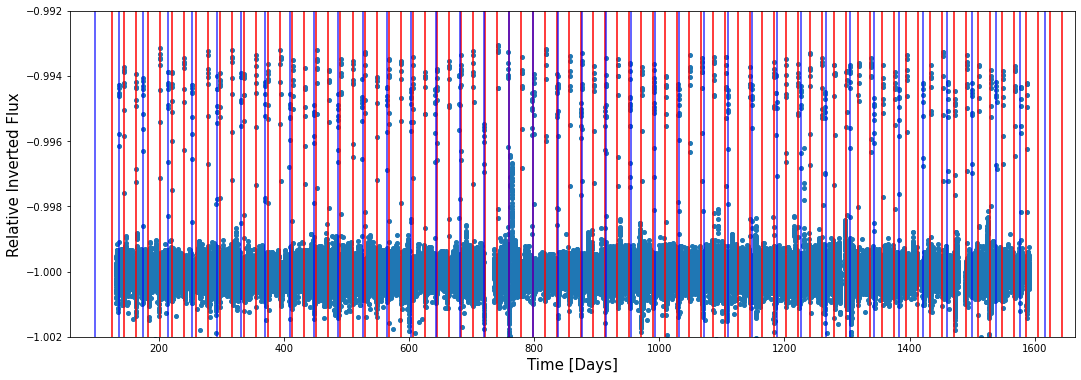

In [12]:
plt.figure(figsize=(18,6))
plt.plot(curve['time'],-curve['flux'], ls='None',marker ='o', markersize=4) #inverting to use find_peaks
plt.ylim(-1.002,-0.992)
plt.xlabel('Time [Days]', size=15)
plt.ylabel('Relative Inverted Flux', size=15)

#planet periods
actper = 19.23
actper2 =38.938
#identification of planet transits- Red= Peanut Butter, Blue=Strawberry Jelly
for i in range(80):
    plt.axvline((actper*i+131.513013-6.5), c='r')
for i in range(40):
    plt.axvline((actper2*i+131.513013-34), c='b', alpha=0.8)

#finding peaks with limits set to within where peaks should be
transits19=find_peaks(-curve['flux'],[-0.9944,-0.992])
transits38=find_peaks(-curve['flux'],[-0.9954,1-0.005])


*Figure 6.* Inverted lightcurve to enable use of scipy.signal.find_peaks to detect the transits automatically. Note that the baseline is not perfectly uniform and so detection of peaks even with upper and lower boundaries imposed is difficult. 

[Text(0, 0.5, 'Transit Time Variation [Days]')]

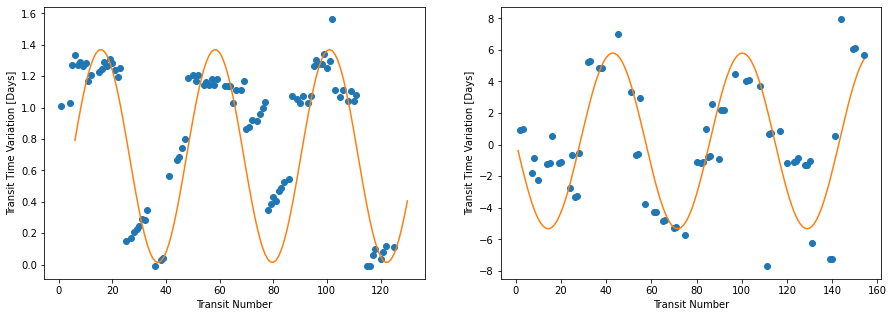

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)

array, magnitudes = transits19
transittimes=[] #array to hold transit timing variations for Peanut Butter

#looping through the indexes to obtrain the transit times
for i in array:
    #modulus division of transit time by Peanut Butter's period to obtain time deviation
    time= ((curve['time'][i])-144.25)%(19.23)
    if time <15:
        transittimes.append(time) #transits late
    else:
        transittimes.append(time-19.23) #if time deviation >15 then likely transits early, so need to subtract

#masking TTVs for Peanut Butter to exclude extreme outliers
transittimes=ma.masked_outside(transittimes,(-0.4),(2.5), copy=True)
x=np.linspace(1,len(transittimes),len(transittimes))


array2, magnitudes=transits38
transittimes2=[] #array to hold transit timing variations for Strawberry Jelly

#looping through the indexes to obtrain the transit times
for i in array2:
    #modulus division of transit time by Strawberry Jelly's period to obtain time deviation
    time= ((curve['time'][i])-136.31)%(38.938)
    if time <30:
        transittimes2.append(time) #transits late
    else:
        transittimes2.append(time-38.938)  #if time deviation >30 then likely transits early, so need to subtract

#masking TTVs for Strawberry Jelly to exclude outliers and incorrect transits picked up corresponding to Peanut Butter
transittimes2=ma.masked_outside(transittimes2,(-8),(8), copy=True)
transittimes2= ma.masked_inside(transittimes2,-0.5,0.5)
x2=np.linspace(1,len(transittimes2),len(transittimes2))

#plotting and fitting sine waves to the TTV curves
ax1.plot(x,transittimes, ls='None',marker='o')
pt,pv = curve_fit(sinwave,x,transittimes,p0=(0.75,0.15,0.5))
ax1.plot(x+5,(sinwave(x,*pt)*-1.15)+3.35)
ax1.set(xlabel='Transit Number')
ax1.set(ylabel='Transit Time Variation [Days]')

plt.plot(x2,transittimes2, ls='None',marker='o')
pt2,pv2 =curve_fit(sinwave,x2,transittimes2,p0=(5,0.12,1.5))
ax2.plot(x2,(sinwave(x2/1.05,*pt2)*2.1)-13)
ax2.set(xlabel='Transit Number')
ax2.set(ylabel='Transit Time Variation [Days]')


*Figure 7.* TTV curves, approximately fit in the form of a sine wave, from which can be determined the maximum deviation from the expected period. On the left, Peanut Butter shows a maximal deviation of 1.4 days while on the right, Strawberry Jelly shows a maximal deviation of 5.8 days. Some points to notice are that Peanut Butter is almost always late in transiting while Strawberry Jelly is about equally late as early for transit. Late refers to a positive time deviation, while early refers to a negative time deviation.

In [14]:
#Looking at the min and max values of the fits to determine by modulus the greatest time variation for Peanut Butter
print(np.min((sinwave(x,*pt)*-1.15)+3.35))
print(np.max((sinwave(x,*pt)*-1.15)+3.35))

0.01384421140559633
1.3696618186999099


In [15]:
#Looking at the min and max values of the fits to determine by modulus the greatest time variation for Strawberry Jelly
print(np.max((sinwave(x2/1.05,*pt2)*2.1)-13))
print(np.min((sinwave(x2/1.05,*pt2)*2.1)-13))

5.79881422656408
-5.327706051184561


In [16]:
#Reading in and inspecting data from NASA exoplanet archive
nasa = pd.read_csv('NASAdata.csv', delimiter =',')
nasa.head()

,discoverymethod,semimajoraxis,radius,mass,density,eccentricity,inclination,ttv,depth
0,Imaging,NaN,6.725,NaN,NaN,NaN,NaN,0.0,NaN
1,Imaging,NaN,10.088,NaN,NaN,NaN,NaN,0.0,NaN
2,Imaging,NaN,10.088,NaN,NaN,NaN,NaN,0.0,NaN
3,Imaging,8.0,10.468,6992.0,NaN,NaN,NaN,0.0,NaN
4,Imaging,NaN,11.209,NaN,NaN,NaN,NaN,0.0,NaN


Text(0, 0.5, 'Mass [$R_{Earth}$]')

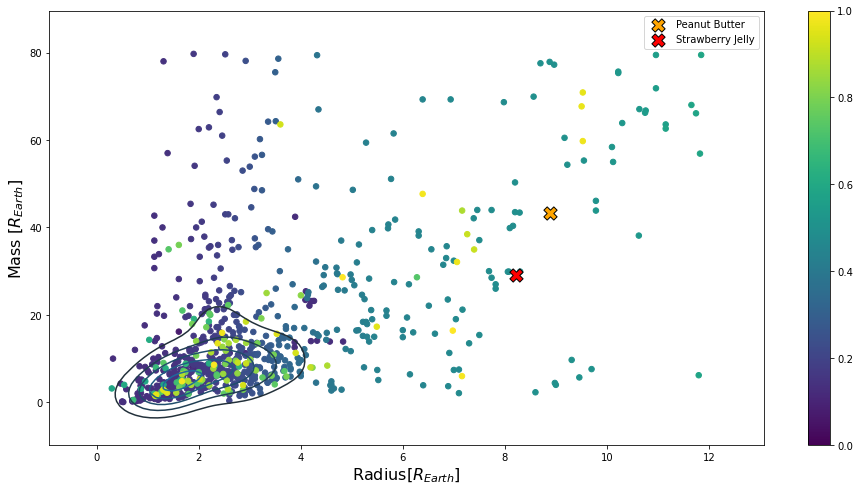

In [17]:
plt.figure(figsize=(16,8))
nasa1= nasa.dropna(axis=0,how='any',subset=['radius','mass']) #dropping rows of data with NaN values
mask= (nasa1['radius']<12) & (nasa1['mass']<80) #mask to consider relevant data

#converting to arrays
radius = np.array(nasa1['radius'])[mask]
mass= np.array(nasa1['mass'])[mask]

#setting number density distribution
dencol=density_scatter(radius,mass, bins = [30,50])

# Plotting data points, colour coded according to number density
# c=dencal argument sets colour-coding according to number density
pylab.scatter(radius, mass, c=dencol,cmap=cm.viridis, marker='o', s=30) 
#drawing density contours
sns.kdeplot(radius, mass, levels=5)

#plotting positions of planets
plt.scatter(8.88,43.4, label='Peanut Butter', marker='X', color='orange', s=175, edgecolor='k')
plt.scatter(8.21,29.1, label='Strawberry Jelly', marker='X', color='red', s=175, edgecolor='k')
plt.legend()
plt.colorbar()

pylab.xlabel(r'Radius[$R_{Earth}$]',fontsize=16)
pylab.ylabel(r'Mass [$R_{Earth}$]',fontsize=16)

*Figure 8.* 2D Sample distribution of mass against radius, with relative number density encoded in the colour mapping. Contours are plotted to visualise those outliers, with those outside the second contour being inconsostent with 95% (2$\sigma$) of the poopulation. The locations of Peanut Butter and Strawberry Jelly are plotted on the figure and are obviously outliers. For their size of radius they have a relatively small mass, suggesting a low density. 

[Text(0, 0.5, 'Number of Planets')]

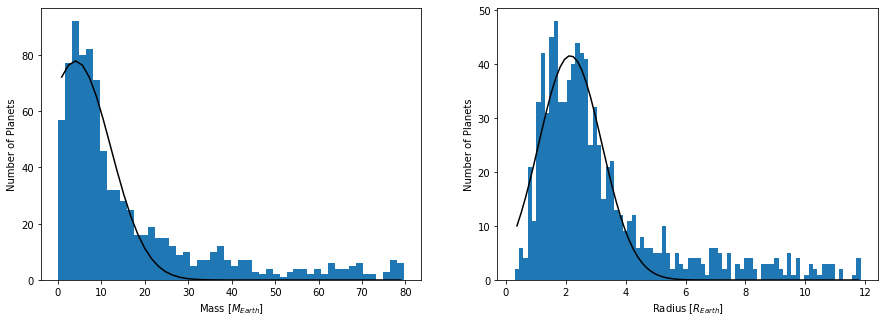

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)

# Creating histogram for mass
num, Lbins, patches = ax1.hist(mass,bins=50)

# initial estimates for the Guassian mu and sigma values
mu_0=np.mean(Lbins)
sigma_0=np.std(Lbins)

# modify the Lbins array to have same length as num using the central value of each luminosity bin in the histogram
binsize = (np.max(mass)-np.min(mass))/50.
Lbins_centre = Lbins[:-1]+binsize/2.
popt,pcov = curve_fit(gauss,Lbins_centre,num,p0=[1,mu_0,sigma_0])

#Best fit values
amplitude = popt[0]
mu = popt[1]
sigma = popt[2]
y = gauss(Lbins_centre,amplitude,mu,sigma)
ax1.plot(Lbins_centre, y, color ='black') #plotting Gaussian over histogram
ax1.set(xlabel='Mass [$M_{Earth}$]')
ax1.set(ylabel='Number of Planets')


# Creating histogram for radius
num, Lbins, patches = ax2.hist(radius,bins=80)

# initial estimates for the Guassian mu and sigma values
mu_0=np.mean(Lbins)
sigma_0=np.std(Lbins)

# modify the Lbins array to have same length as num using the central value of each luminosity bin in the histogram
binsize = (np.max(radius)-np.min(radius))/80.
Lbins_centre = Lbins[:-1]+binsize/2.
popt,pcov = curve_fit(gauss,Lbins_centre,num,p0=[1,mu_0,sigma_0])

#Best fit values
amplitude = popt[0]
mu = popt[1]
sigma = popt[2]
y = gauss(Lbins_centre,amplitude,mu,sigma)
ax2.plot(Lbins_centre, y, color ='black') #plotting Gaussian over histogram
ax2.set(xlabel='Radius [$R_{Earth}$]')
ax2.set(ylabel='Number of Planets')

*Figure 9.* Histograms of mass (left) and radius (right) with a Gausian fit plotted over them in black to determine whether the data can be considered normally distributed. The Gaussians fit generally well to the data, although some bins significanty overshoot and both datasets are skewed to the lower end. A parametric Pearson rank test requiring normally distributed data would likely work fine, but it may be worth doing a Spearman rank test for comparison.

In [19]:
# Spearman's rank test to assess the significance of our correlation
from scipy.stats import spearmanr

#calculating the Spearman rank correficient
rank,sp_pvalue = spearmanr(radius,mass)

print('\033[1m' + "radius and mass have a Spearman's rank %.2f and p-value of %.2e" % (rank,sp_pvalue) + '\033[0m')
print('\n(I.e. there is %.2f%% probability that the Speaman rank is %.2f given the null hypothesis)' % (sp_pvalue*100,rank))

radius and mass have a Spearman's rank 0.61 and p-value of 1.92e-91

(I.e. there is 0.00% probability that the Speaman rank is 0.61 given the null hypothesis)


In [20]:
#Pearon's correlation test
from scipy.stats import pearsonr

#calculating Pearson rank coefficient
PCC,PCC_pvalue = pearsonr(radius,mass)

print('\033[1m' + "Luminosity and stellar mass have a Pearson's correlation coefficient %.2f and p-value of %.2e" % (PCC,PCC_pvalue) + '\033[0m')
print('\n(I.e. there is %.1f%% probability that the Speaman rank is %.2f given the null hypothesis)' % (PCC_pvalue*100,PCC))

Luminosity and stellar mass have a Pearson's correlation coefficient 0.61 and p-value of 9.87e-91

(I.e. there is 0.0% probability that the Speaman rank is 0.61 given the null hypothesis)


(0.0, 1.0)

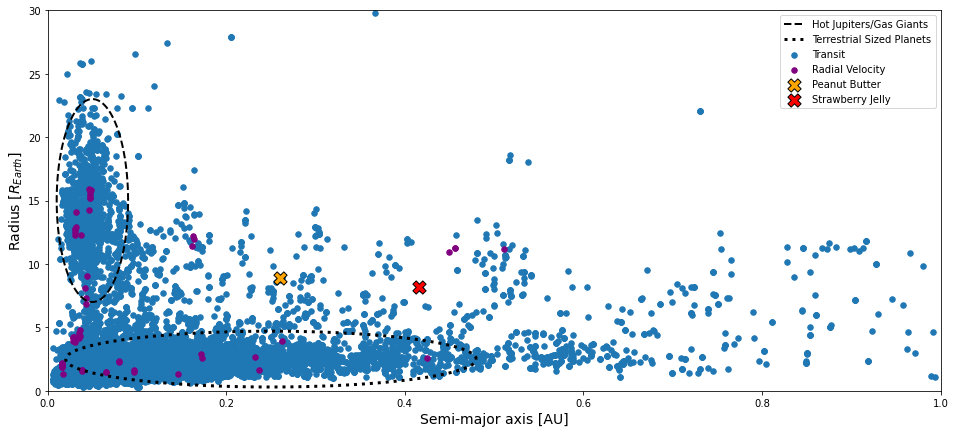

In [21]:
plt.figure(figsize=(16,7))

#separating data by discovery method
radialv= nasa.loc[nasa['discoverymethod'] == 'Radial Velocity']
transit= nasa.loc[nasa['discoverymethod'] == 'Transit']

#dropping rows with NaN values
transit=transit.dropna(axis=0,how='any',subset=['radius','semimajoraxis'])
radialv=radialv.dropna(axis=0,how='any',subset=['radius','semimajoraxis'])

#plotting semi-major axis vs radius seperatly for planets discovered by transit or radial velocity
plt.scatter(transit['semimajoraxis'],transit['radius'], marker='o', label='Transit', s=30)
plt.scatter(radialv['semimajoraxis'],radialv['radius'], marker='o',label='Radial Velocity', s=30, color='purple')

#plotting our planet positions
plt.scatter(0.26,8.88,label='Peanut Butter', color='orange', marker='X', s=175, edgecolor='k')
plt.scatter(0.416,8.21, label='Strawberry Jelly', color='red', marker='X',s=175, edgecolor='k')

#plotting ellipses to show distinct planet ditributions
t= np.linspace(0, 2*np.pi,100)
plt.plot( 0.05+0.04*np.cos(t) , 15+8*np.sin(t),ls='--', linewidth= 2,color='k', label='Hot Jupiters/Gas Giants')
plt.plot( 0.25+0.23*np.cos(t) , 2.5+2.2*np.sin(t), ls='dotted',linewidth=3, color='k', label='Terrestrial Sized Planets')

plt.xlabel('Semi-major axis [AU]', size=14)
plt.ylabel('Radius [$R_{Earth}$]', size=14)
plt.legend()
#limits to ignore extreme values and focus on relevant data
plt.ylim(0,30)
plt.xlim(0,1)

*Figure 10.* Plot of semi-major orbit against radius reveals two distinct groupings of planets. Those encircled by the vertical ellipse with semi-major axes of <0.1 AU, can be considered 'Hot Jupiters', while those encircled by the horizontal ellipse at lower radii are more terrestrial-like planets. These groupings are a result of selection effects, particularly those applicable to the transit method. Planets discovered via the transit method are plotted in blue and those discovered via radial velocity are plotted in orange. It is easy to see that transits are in the majority. Peanut Butter and Strawberry Jelly appear to be outliers of both planet groupings and their locations are shown in the figure.

In [22]:
#Kolmogorov-Smirnov test
from scipy.stats import ks_2samp

#Applying KS test to measure similarity
D, P = ks_2samp(transit['radius'],radialv['radius'])

print('\033[1m' + "The probability that D=%.2f given the null hypothesis is %.1f %%" % (D,P*100) + '\033[0m')

The probability that D=0.47 given the null hypothesis is 0.0 %


### 4. Summary

$\bullet$ summarize your results. This can be done in text or bullet points.

<div class="alert alert-block alert-danger">
<b>Word limit: 300 words</b>

By analysing the Kepler lightcurve, two planets were discovered; Peanut Butter and Strawberry Jelly. Parameters for the planets were calculated by fitting transits and using theoretical equations. Values are given in the order of Peanut Butter then Strawberry Jelly as follows...

- transit depth: 0.006611 +/- 0.000074 and 0.00566 +/- 0.00010
- radius: (8.88$\pm$0.10)$R_{Earth}$ and (8.82$\pm$0.10)$R_{Earth}$ 
- transit time: (1.56 $\pm$ 0.12) x $10^4$s and (1.66 $\pm$ 0.21) x $10^4$s. 
- average density: (3.41 +0.17/-0.19) x $10^2$ kg/m$^3$ and (4.31 +0.24/-0.26) x $10^2$ kg/m$^3$ 
- semi-major axis: (0.260 $\pm$ 0.006) AU and (0.416 $\pm$ 0.009) AU

The two planets are in MMR and are significantly affected by TTVs. By plotting the TTVs, an approximate sine wave was fit and $\delta t_{max}$ was obtained for each planet, which was 1.4 days for Peanut Butter and 5.8 days for Strawberry Jelly. These $\delta t_{max}$ values, when compared to theoretical limits, are 9% and 16% off respectively. Accuracy of these TTV values was limited by the fact that the normalised lightcurve was not perfectly flat, and thus it was difficult to pick out the transits corresponding to the correct planet using automated methods.

With large radii and low densities, Peanut Butter and Strawberry Jelly appear to be gas giants, but are outliers compared to the general population. Whether this is due to the specification of the planets being less common, or due to selection effects is somewhat uncertain. Current data and literature suggest that it is slightly more likely that the planets are simply found in lower numbers, however there are significantly fewer planets discovered by methods other than the transit method to compare to, so this conclusion may be unreasonable and more planets discovered via other methods would have to be studied for fair sample distriubution comparison.

### References:

- Dunham, 2018, Handbook of Exoplanets, pp 51-62
- Barnes R., 2011., Encyclopedia of Astrobiology, pp 1006
- Yoram Lithwick et al, 2012, ApJ, 761, 122
- Agol, 2005, Monthly Notices of the Royal Astronomical Society, 359,567–579
- Haghighipour N., 2015, Encyclopedia of Astrobiology, pp 1906-1909
- M. Zhao et al, 2011, PASP, 123, 964
- Anayeva, 2020, Icarus, 346, article 113773
- Perryman, 2018, The Exoplanet Handbook, pp 153 - 328
- Boruki & Summers, 1984, Icarus, 58, 121-134
- Borsato et al., 2019, Monthly Notices of the Royal Astronomical Society, 484, 3233-3243


### Acknowledgments

Acknowledgements to NASA Exoplanet Archive for exoplanet data used to generate Figures 8 and 10, and to the use of Python packages- particularly numpy, pandas, matplotlib.pyplot, pylab, and scipy.